## PERCEPTRON MODEL


##### 1) Implementation of Perceptron Algorithm

In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [482]:
from perceptron import PerceptronAlgorithm

##### 2) Preprocessing

In [483]:
# Generate dataset with clear class separation
X, y = make_blobs(
    n_samples=100,        # Number of data points
    n_features=2,         # Number of features (2 for visualization purposes)
    centers=[(-1.44, -1.44), (1.44, 1.44)],  # Coordinates of cluster centers
    random_state=42       # Seed for reproducibility
)

dataset = pd.DataFrame(X, columns=["Feature1", "Feature2"])
dataset["Class"] = y

dataset.to_csv("linear_separable_dataset.csv", index=False)

print(dataset.head())

   Feature1  Feature2  Class
0  1.913238  1.367171      1
1 -2.279218 -1.749212      0
2 -0.478771  1.413486      1
3 -1.919174 -1.625659      0
4  0.465318  2.227085      1


In [484]:
# split independent and dependent variables
x = dataset.iloc[:100, [0, 1]].values
y = dataset.iloc[:100, -1].values

In [485]:
x[:5]

array([[ 1.91323762,  1.36717109],
       [-2.27921752, -1.74921238],
       [-0.47877122,  1.41348612],
       [-1.91917424, -1.62565898],
       [ 0.46531833,  2.2270846 ]])

In [486]:
y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

##### 3) Exploratory Analysis of data

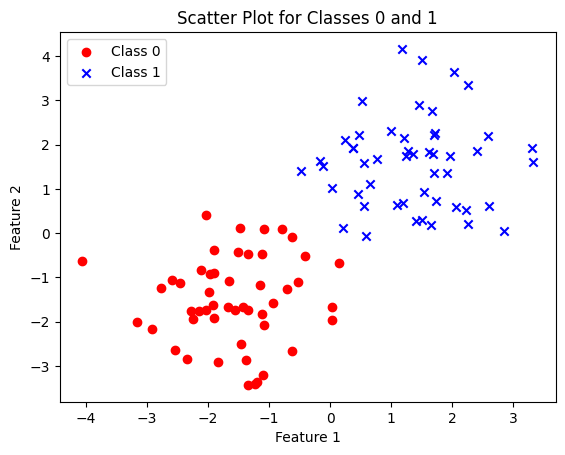

In [487]:
# Visualize the data
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot for Classes 0 and 1')

plt.show()

##### 4) Training step

In [488]:
# training process
model = PerceptronAlgorithm(eta=0.01, max_epochs=100, threshold=0.001)
model.fit(x, y)

Epoch  1  ===> error =  [0.025] ... 

Epoch  2  ===> error =  [0.01] ... 

Epoch  3  ===> error =  [0.01] ... 

Epoch  4  ===> error =  [0.01] ... 

Epoch  5  ===> error =  [0.01] ... 

Epoch  6  ===> error =  [0.01] ... 

Epoch  7  ===> error =  [0.005] ... 

Epoch  8  ===> error =  [0.005] ... 

Epoch  9  ===> error =  [0.005] ... 

Epoch  10  ===> error =  [0.005] ... 

Epoch  11  ===> error =  [0.005] ... 

Epoch  12  ===> error =  [0.005] ... 

Epoch  13  ===> error =  [0.] ... 



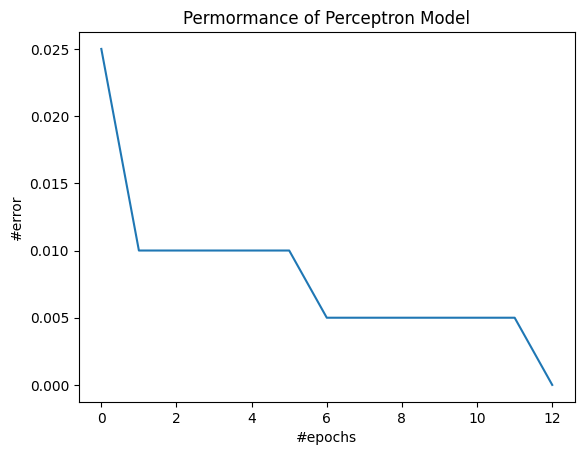

In [489]:
plt.plot(range(len(model.cost_)), model.cost_)
plt.title("Permormance of Perceptron Model")
plt.xlabel("#epochs")
plt.ylabel("#error")
plt.show()

In [490]:
from matplotlib.colors import ListedColormap

# plot the decision region of perceptron
def plot_decision_regions(x, y, classifier, resolution = 0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.5, cmap = cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                        
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha = 0.8, 
                    color = cmap(idx), marker = markers[idx], label = classe)

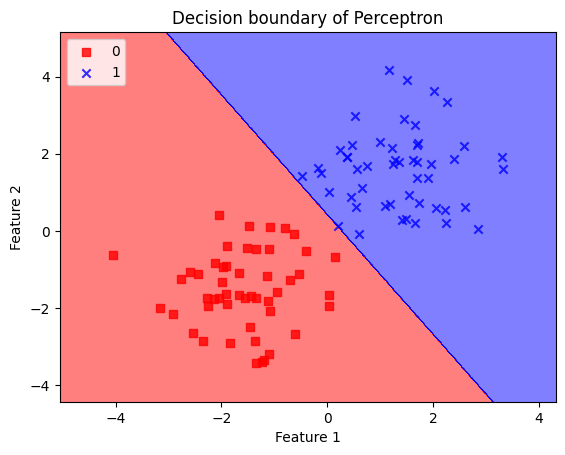

In [491]:
plot_decision_regions(x, y, model)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Decision boundary of Perceptron')
plt.show()

##### 5) Testing the model

In [492]:
# Generate test dataset with similar settings
X_test, y_test = make_blobs(
    n_samples=50,         # Number of data points for the test set
    n_features=2,         # Number of features (2 for visualization purposes)
    centers=[(-1.44, -1.44), (1.44, 1.44)],  # Coordinates of cluster centers
    random_state=43       # Different seed for some variation
)

test_dataset = pd.DataFrame(X_test, columns=["Feature1", "Feature2"])
test_dataset["Class"] = y_test

# Save the test dataset to a CSV file
test_dataset.to_csv("linear_separable_test_dataset.csv", index=False)

# Print the first few rows of the test dataset
print(test_dataset.head())

   Feature1  Feature2  Class
0 -0.177138 -1.879215      0
1  1.118895  1.945869      1
2  1.536932  1.251616      1
3 -2.847878 -0.632151      0
4 -0.947089 -1.564313      0


In [493]:
x_testing = test_dataset.iloc[:50, [0, 1]].values
y_testing = test_dataset.iloc[:50, -1].values

In [ ]:
model.test(x_testing, y_testing)
print(f'Perceptron accuracy: {model.accuracy}%')


Perceptron accuracy: 100.0%


In [498]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.test(x_testing, y_testing)
print(f'accuracy_score = {accuracy_score(y_testing, y_pred)}')
print(f'precision_score = {precision_score(y_testing, y_pred)}')
print(f'recall_score = {recall_score(y_testing, y_pred)}')
print(f'f1_score = {f1_score(y_testing, y_pred)}')
print(confusion_matrix(y_testing, y_pred))

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0
[[25  0]
 [ 0 25]]
